In [1]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *

# 100 runs


In [2]:
results = load_results_from_pickle("../results/100_runs/results_100_runs.pickle")

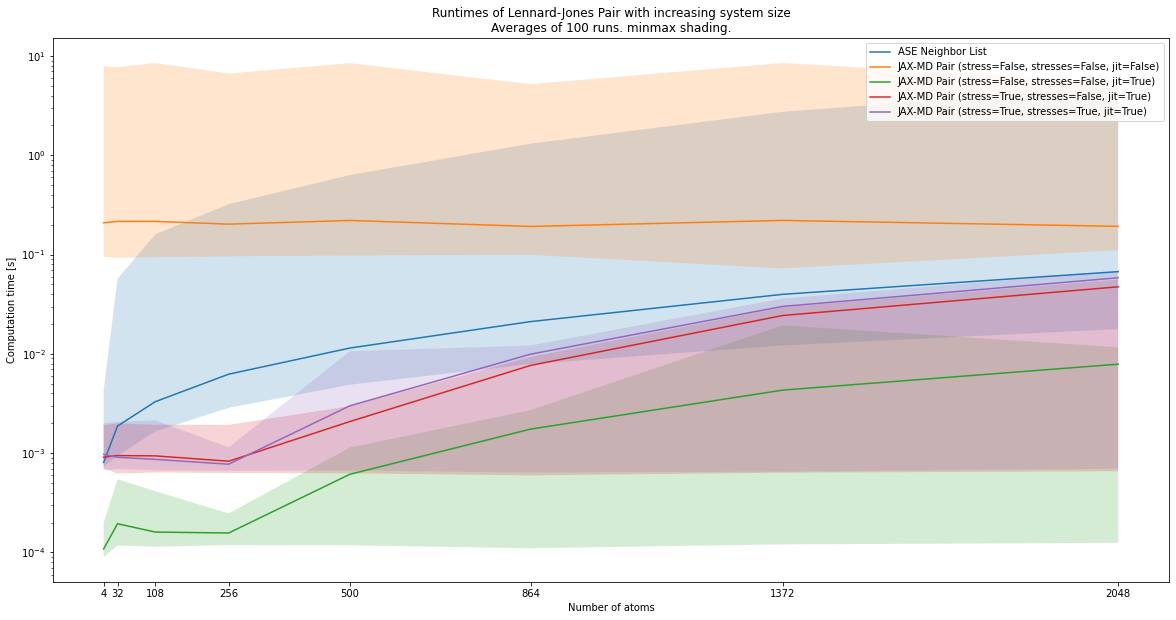

In [3]:
plot_runtimes(results=results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              shade_by='minmax')

## Omitting slow calculators

i.e. ASE and JAX-MD without `jit`.

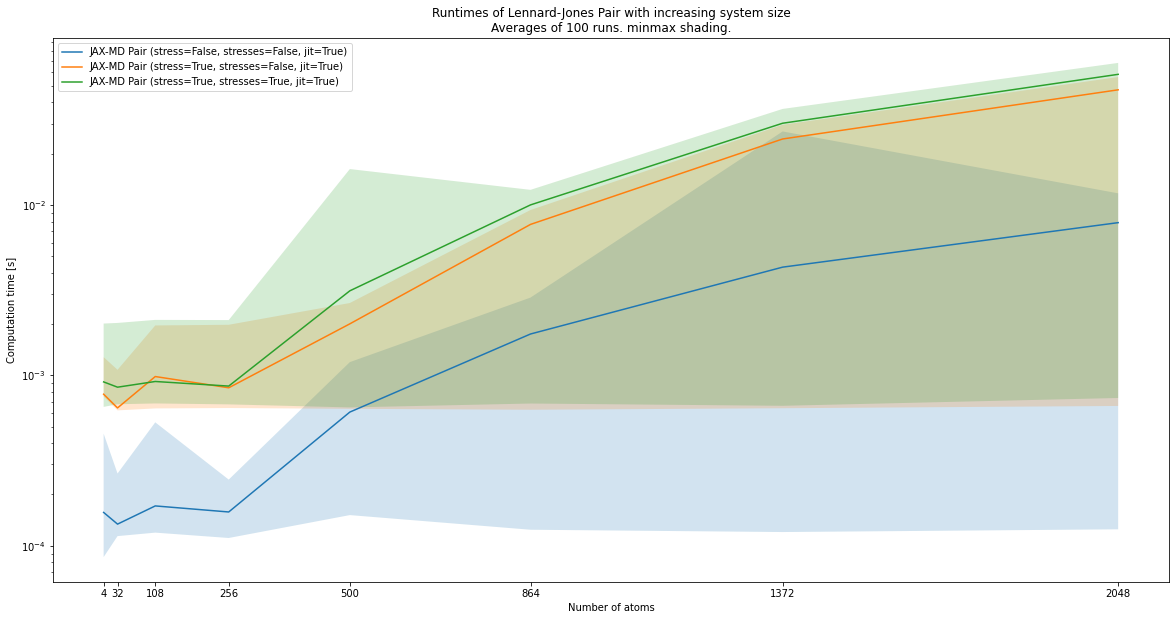

In [34]:
filtered_results = list(filter(lambda r: "jit=False" not in r.calculator.description, results))
filtered_results = list(filter(lambda r: "ASE" not in r.calculator.description, filtered_results))
filtered_results = list(filter(lambda r: "ASAX" not in r.calculator.description, filtered_results))

plot_runtimes(results=filtered_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              shade_by='minmax')

## Caching in JAX-MD
- Within each of the 100 runs, we don't change the system at all.
- Caching would be possible and could distort results.
- Here, we exclude everything except the JAX-MD calculator.
- There are fluctuations but caching would likely prevent the mean curve from constantly increasing.

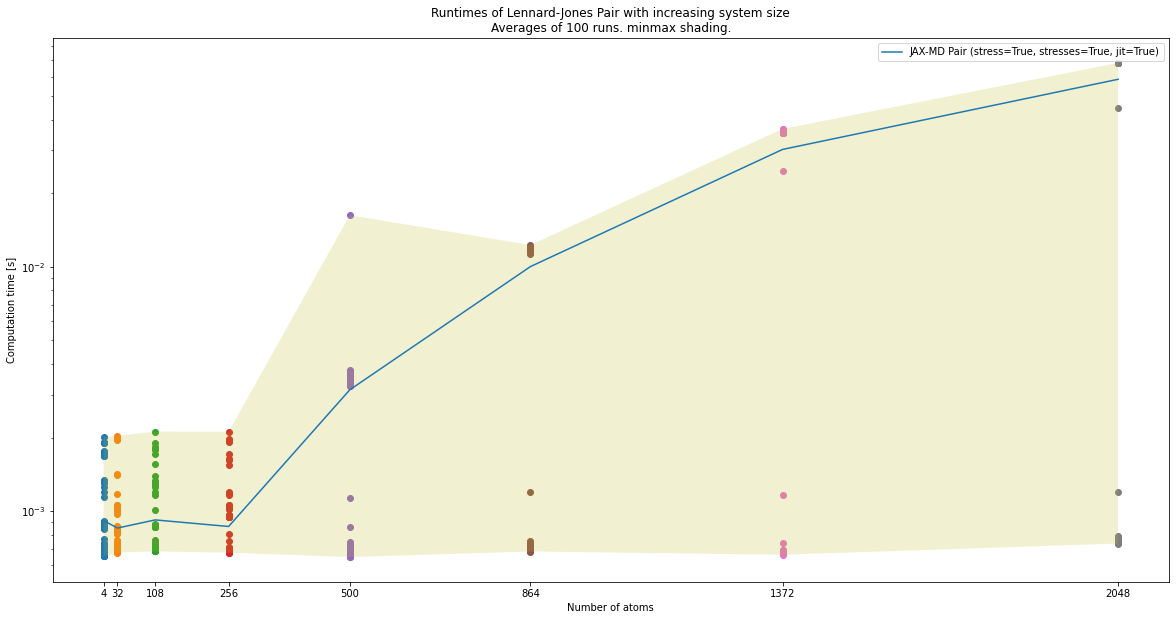

In [35]:
filtered_results = list(filter(lambda r: "jit=True" in r.calculator.description, results))
filtered_results = list(filter(lambda r: "stress=True" in r.calculator.description, filtered_results))
filtered_results = list(filter(lambda r: "stresses=True" in r.calculator.description, filtered_results))

plot_runtimes(results=filtered_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              scatter=True,
              shade_by='minmax')

## Investigate runtime variance

- For a selected JAX-MD Pair Calculator with `stress=True`, `stresses=True`, `jit=True`.
- Per system size, plot the runtime over its indices.
- 

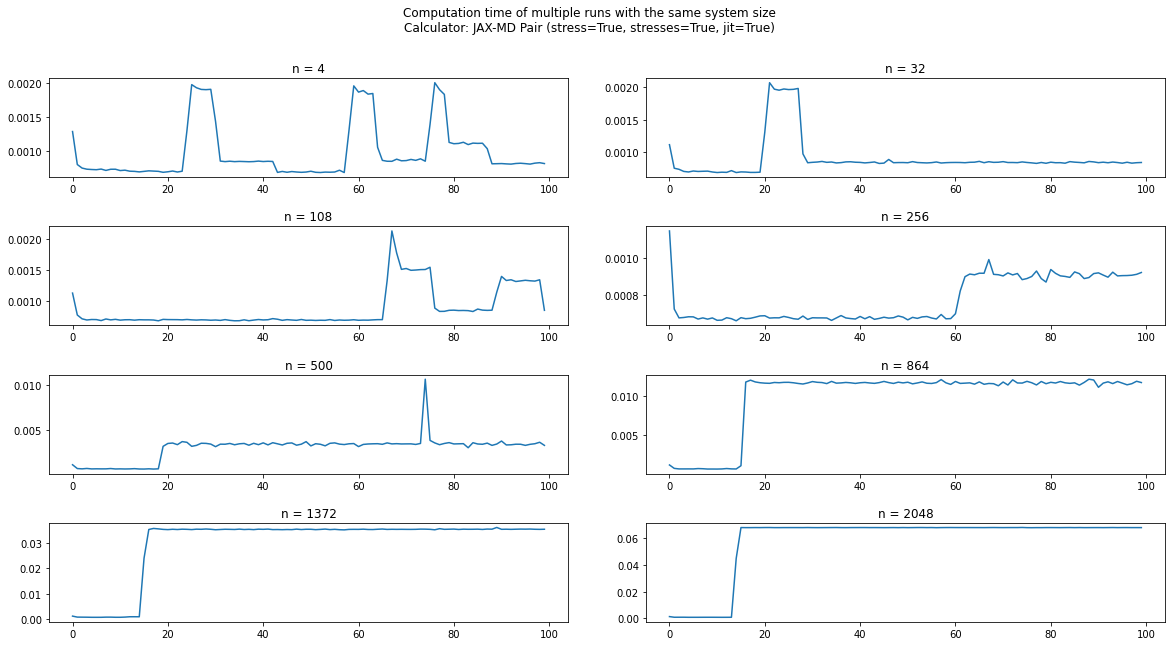

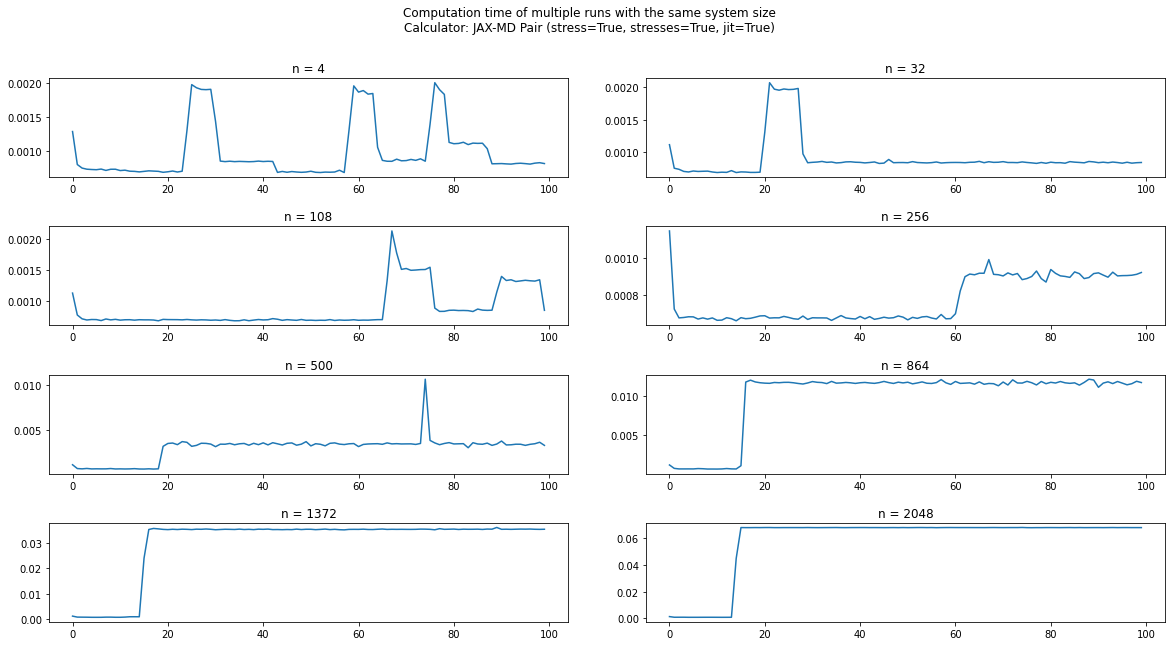

In [5]:
description = "JAX-MD Pair (stress=True, stresses=True, jit=True)"
single_calculator_results = list(filter(lambda r: r.calculator.description == description, results))
plot_runtime_variances(single_calculator_results)